In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
response = requests.get('https://practicum.yandex.ru/catalog/programming/')
soup = BeautifulSoup(response.text, 'html.parser')
cards = soup.find_all('a', class_='prof-card__content-link')

In [3]:
courses = []
links = []
for card in cards:
    courses.append(card.text)
    links.append(card.get('href'))

In [4]:
courses.pop(0)
links.pop(0)

'/start-in-programming/?from=catalog'

In [5]:
courses = [course.replace("\xa0", "") for course in courses]
links = ['https://practicum.yandex.ru' + link for link in links]
links = [link.replace("/?from=catalog","") for link in links]

In [6]:
df = pd.DataFrame({'Course':courses, 'Link':links, 'Price':None})

In [7]:
df['Price'] = None
df.head()

,Course,Link,Price
0,Фронтенд-разработчик,https://practicum.yandex.ru/frontend-developer,None
1,Фулстек-разработчик,https://practicum.yandex.ru/fullstack-developer,None
2,Python-разработчик,https://practicum.yandex.ru/backend-developer,None
3,Python-разработчик расширенный,https://practicum.yandex.ru/python-developer-plus,None
4,Инженер потестированию,https://practicum.yandex.ru/qa-engineer,None


In [8]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Chrome()
driver.get('https://practicum.yandex.ru/catalog/programming')
cards = WebDriverWait(driver,20).until(
    EC.presence_of_all_elements_located((By.CLASS_NAME, "prof-card__content-link"))
)   


In [9]:

import time
for i, card in enumerate(cards):
    
    driver.execute_script("arguments[0].scrollIntoView(true);", card)
    time.sleep(1)
    driver.implicitly_wait(5)
    card.screenshot(f'img/{i}.png')
    

In [17]:
driver.quit()

In [10]:
import pytesseract
import re
from PIL import Image
for i in range(1, len(cards)):
    image = Image.open(f'img/{i}.png')
    text = pytesseract.image_to_string(image, lang='rus')
    pattern = r'(?:\d+\s)*\d*[2Р?]\b' 
    matches = re.findall(pattern, text)
    if len(matches) == 0:
        df.iloc[i-1]['Price'] = None
    if len(matches) == 1:
        df.iloc[i-1]['Price'] = int(matches[0][:-1].replace(" ", ""))
    if len(matches) == 2:
        df.iloc[i-1]['Price'] = int(matches[1][:-1].replace(" ", ""))

In [11]:
df

,Course,Link,Price
0,Фронтенд-разработчик,https://practicum.yandex.ru/frontend-developer,147000
1,Фулстек-разработчик,https://practicum.yandex.ru/fullstack-developer,225000
2,Python-разработчик,https://practicum.yandex.ru/backend-developer,159000
3,Python-разработчик расширенный,https://practicum.yandex.ru/python-developer-plus,226000
4,Инженер потестированию,https://practicum.yandex.ru/qa-engineer,77000
5,Java-разработчик,https://practicum.yandex.ru/java-developer,154000
6,Разработчик 1С,https://practicum.yandex.ru/1c-programmer,122000
7,Инженер потестированию расширенный,https://practicum.yandex.ru/qa-engineer-plus,148000
8,Разработчик C++,https://practicum.yandex.ru/cpp,138000
9,iOS-разработчик,https://practicum.yandex.ru/ios-developer,146000


In [12]:
df.dropna(inplace=True)
df

,Course,Link,Price
0,Фронтенд-разработчик,https://practicum.yandex.ru/frontend-developer,147000
1,Фулстек-разработчик,https://practicum.yandex.ru/fullstack-developer,225000
2,Python-разработчик,https://practicum.yandex.ru/backend-developer,159000
3,Python-разработчик расширенный,https://practicum.yandex.ru/python-developer-plus,226000
4,Инженер потестированию,https://practicum.yandex.ru/qa-engineer,77000
5,Java-разработчик,https://practicum.yandex.ru/java-developer,154000
6,Разработчик 1С,https://practicum.yandex.ru/1c-programmer,122000
7,Инженер потестированию расширенный,https://practicum.yandex.ru/qa-engineer-plus,148000
8,Разработчик C++,https://practicum.yandex.ru/cpp,138000
9,iOS-разработчик,https://practicum.yandex.ru/ios-developer,146000


In [13]:
df.drop([54,55, 57], inplace=True) #Обработка исключений
df


,Course,Link,Price
0,Фронтенд-разработчик,https://practicum.yandex.ru/frontend-developer,147000
1,Фулстек-разработчик,https://practicum.yandex.ru/fullstack-developer,225000
2,Python-разработчик,https://practicum.yandex.ru/backend-developer,159000
3,Python-разработчик расширенный,https://practicum.yandex.ru/python-developer-plus,226000
4,Инженер потестированию,https://practicum.yandex.ru/qa-engineer,77000
5,Java-разработчик,https://practicum.yandex.ru/java-developer,154000
6,Разработчик 1С,https://practicum.yandex.ru/1c-programmer,122000
7,Инженер потестированию расширенный,https://practicum.yandex.ru/qa-engineer-plus,148000
8,Разработчик C++,https://practicum.yandex.ru/cpp,138000
9,iOS-разработчик,https://practicum.yandex.ru/ios-developer,146000


[147000 225000 159000 226000 77000 154000 122000 148000 138000 146000
 180000 220000 152000 152000 153000 98000 103000 66000 156000 158000 54000
 98000 177000 148000 147500 86000 7716 60000 140000 202000 233000 30000
 106000 86000 96000 201000 280000 137000 120000 173000 129000 125000
 173000]


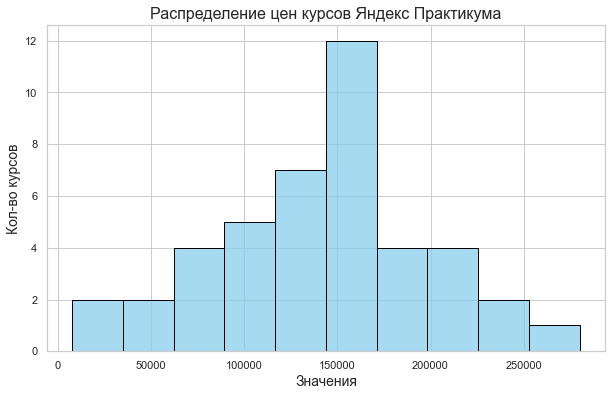

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
prices = df['Price'].to_numpy()
print(prices)
sns.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(10, 6))  # Размер графика
sns.histplot(prices, color='skyblue', bins=10, edgecolor='black')

# Добавление заголовка и подписей осей
plt.title('Распределение цен курсов Яндекс Практикума', fontsize=16)
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Кол-во курсов', fontsize=14)

# Отображение графика
plt.show()

In [15]:
df_sorted = df.sort_values(by='Price')
del df_sorted['Link']
df_sorted = df_sorted.tail()

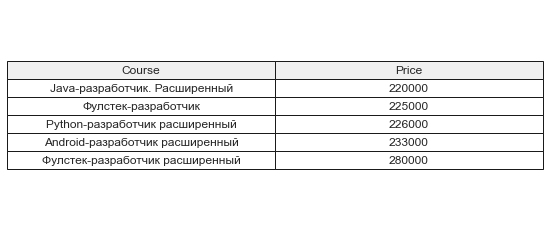

In [16]:
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
# Создаем таблицу с помощью seaborn
table = plt.table(cellText=df_sorted.values,
                  colLabels=df_sorted.columns,
                  loc='center',
                  cellLoc='center',
                  colColours=['#f0f0f0']*len(df.columns))  # цвет заголовков

# Настраиваем внешний вид таблицы
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)  # масштабируем таблицу (ширина, высота ячеек)

# Убираем оси
plt.axis('off')

# Показываем таблицу
plt.show()